plotting the distance dependence of the Cramer's V. the distance on genome in kilo base pairs
- a short distance means the genomes/species are more closely related

In [101]:
 ## imports
import numpy as np
import networkx as nx
import scipy.stats as stats
import pandas as pd
import sklearn as sk
import matplotlib
from matplotlib import pyplot as plt 
from bed_reader import open_bed

In [102]:
# get cramer's matrix
arr = np.loadtxt("chrom19cramer100.csv",
                 delimiter=",", dtype=np.float64) # chromosome 19, every 100 SNP
# get triangle
triangle = np.triu(arr, k=1) # get upper half
triangleSparse = sparse.csr_matrix(triangle)
print(triangleSparse.shape)

(262, 262)


In [103]:
# create distance matrix
file_name_bim = '/Users/rishasurana/Library/CloudStorage/GoogleDrive-rsurana@usc.edu/.shortcut-targets-by-id/1I-Ssaub3M29w33JyrvO7HVv9laffGidc/chromosome_17_bed_bim_fam_data/ukb22418_c19_b0_v2.bim'
arr = np.loadtxt(file_name_bim, usecols=(3))
test = arr[::100]

size = test.shape[0]
sub = np.zeros((size,size))
for i,x in enumerate(test):
    for j,y in enumerate(test):
        sub[i,j] = abs(x-y)

distance = np.triu(sub, k=1) # get upper half
distanceSparse = sparse.csr_matrix(distance)
print(distanceSparse)

  (0, 1)	285613.0
  (0, 2)	403728.0
  (0, 3)	508068.0
  (0, 4)	608396.0
  (0, 5)	724348.0
  (0, 6)	830820.0
  (0, 7)	940213.0
  (0, 8)	1012869.0
  (0, 9)	1109666.0
  (0, 10)	1142606.0
  (0, 11)	1364090.0
  (0, 12)	1519881.0
  (0, 13)	1691699.0
  (0, 14)	1879526.0
  (0, 15)	2063628.0
  (0, 16)	2226625.0
  (0, 17)	2380148.0
  (0, 18)	2549701.0
  (0, 19)	2766880.0
  (0, 20)	2898950.0
  (0, 21)	3047333.0
  (0, 22)	3246424.0
  (0, 23)	3446522.0
  (0, 24)	3628111.0
  (0, 25)	3780139.0
  :	:
  (254, 258)	771311.0
  (254, 259)	975741.0
  (254, 260)	1181894.0
  (254, 261)	1349770.0
  (255, 256)	182267.0
  (255, 257)	361520.0
  (255, 258)	589283.0
  (255, 259)	793713.0
  (255, 260)	999866.0
  (255, 261)	1167742.0
  (256, 257)	179253.0
  (256, 258)	407016.0
  (256, 259)	611446.0
  (256, 260)	817599.0
  (256, 261)	985475.0
  (257, 258)	227763.0
  (257, 259)	432193.0
  (257, 260)	638346.0
  (257, 261)	806222.0
  (258, 259)	204430.0
  (258, 260)	410583.0
  (258, 261)	578459.0
  (259, 260)	206153.0
 

In [104]:
# plot
x = triangleSparse.todense().tolist()
y = distanceSparse.todense().tolist()

In [105]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in xrange(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap

Number of labels: 262


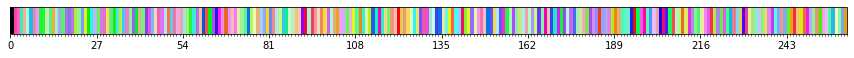

In [106]:
new_cmap = rand_cmap(size, type='bright', first_color_black=True, last_color_black=False, verbose=True)

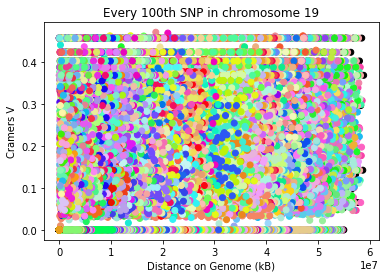

<Figure size 1080x1080 with 0 Axes>

In [114]:
c=np.arange(size*size)
plt.scatter(Y,X, c=c, cmap=new_cmap)
plt.xlabel('Distance on Genome (kbp)') 
plt.ylabel('Cramers V')
plt.title('Every 100th SNP in chromosome 19')
plt.figure(figsize=(15,15))
plt.show()